##강화학습 HW#3

노드의 수와 layer의 수의 제한은 없습니다. 대신 저와 똑같은 노드와 layer 수로 모델을 선정하지 마세요.

학습 환경의 조건은 다음과 같습니다.
1. 카트의 위치가 화면을 벗어나지 않을 것
2. Pole의 각도가 24도 이상 기울어지지 않을 것
3. 위 조건을 200time step동안 유지할 것
4. 200time step동안 유지한 조건을 10회 연속 에피소드에서 성공할 것 (10회 연속 성공시, 학습 종료)

참고자료
https://codetorial.net/articles/cartpole/index.html

참고자료를 보면 코드와 설명이 자세히 나와있어, 과제를 수행하는 것 자체는 전혀 어렵지 않습니다. 전체 코드만 복사 + 붙여넣기 후 조금만 수정해도 문제없이 돌아갈 테니까요. 하지만 반드시 설명도 꼼꼼히 읽으시고, 전반적인 내용을 이해하길 바랍니다.

강화학습을 연습하기 위한 것이 cartpole 예제만 있는 것이 아니라 Open AI gym 을 보면 굉장히 많이 있습니다. 강화학습에 흥미와 관심이 있으신 분들은 다양한 예제를 해보시는 것도 추천드립니다:)

render 함수를 사용하면 어떻게 움직이는지 직접 확인해볼 수 있습니다:)
colab에서 render 함수를 이용해 display 하는 건 구글에 검색하시면 쉽게 찾을 수 있습니다.

In [1]:
import gym
import tensorflow as tf
import numpy as np
import random
from collections import deque

In [2]:
env = gym.make('CartPole-v0')

In [3]:
# your code here
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Dense(40,input_shape=(4,),activation=tf.nn.relu),
                                   tf.keras.layers.Dense(20,activation=tf.nn.relu),
                                   tf.keras.layers.Dense(20,activation=tf.nn.relu),
                                   tf.keras.layers.Dense(2,activation='linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 42        
Total params: 1,482
Trainable params: 1,482
Non-trainable params: 0
_________________________________________________________________


In [4]:
# your code here
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
            loss='mean_squared_error')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [5]:
score = []
memory = deque(maxlen=2000)

In [6]:
# your code here
cnt=0
for i in range(1400):

  state = env.reset()
  state = np.reshape(state, [1, 4])
  eps=1/(i/50+10)

  if cnt==10:
    for k in range(10):
      print('Episode',i-(10-k),'Score',score[k-10])
    break
  else:
      # 200 timesteps
    for t in range(200):
      if np.random.rand()<eps:
        action=np.random.randint(0,2)
      else:
        predict=model.predict(state)
        action=np.argmax(predict)
      next_state,reward,done,_=env.step(action)
      next_state=np.reshape(next_state,[1,4])

      memory.append((state,action,reward,next_state,done))
      state=next_state
      if t==199:
        cnt=cnt+1
        score.append(t + 1)
        break      
      elif done:
        cnt=0
        score.append(t + 1)
        break
        
          
      # Training
  if i > 10:
    minibatch = random.sample(memory, 16)

    for state, action, reward, next_state, done in minibatch:
      target = reward
      if not done:
        target = reward + 0.9 * np.amax(model.predict(next_state)[0])
      target_outputs = model.predict(state)
      target_outputs[0][action] = target
      model.fit(state, target_outputs, epochs=1, verbose=0)        


env.close()
print(score)

Episode 938 Score 200
Episode 939 Score 200
Episode 940 Score 200
Episode 941 Score 200
Episode 942 Score 200
Episode 943 Score 200
Episode 944 Score 200
Episode 945 Score 200
Episode 946 Score 200
Episode 947 Score 200
[10, 14, 9, 12, 9, 27, 10, 22, 12, 25, 19, 15, 12, 9, 9, 10, 10, 10, 10, 9, 9, 8, 11, 8, 9, 9, 9, 9, 11, 10, 8, 9, 9, 11, 11, 8, 10, 9, 27, 13, 11, 10, 9, 11, 10, 12, 13, 18, 13, 11, 14, 9, 9, 14, 10, 9, 10, 11, 10, 11, 11, 10, 9, 10, 9, 10, 10, 12, 13, 13, 17, 10, 25, 21, 16, 23, 22, 13, 10, 15, 10, 10, 13, 15, 13, 10, 15, 11, 14, 14, 11, 10, 13, 16, 16, 11, 12, 16, 31, 25, 24, 18, 13, 28, 18, 22, 29, 35, 18, 26, 36, 22, 14, 16, 14, 13, 18, 12, 12, 16, 44, 40, 35, 36, 10, 10, 9, 11, 9, 9, 9, 9, 19, 22, 27, 35, 37, 15, 23, 31, 47, 27, 46, 23, 24, 64, 23, 16, 13, 11, 11, 13, 22, 38, 45, 47, 36, 31, 86, 29, 17, 8, 9, 10, 8, 10, 33, 30, 78, 35, 10, 11, 12, 9, 8, 8, 11, 9, 10, 9, 9, 10, 9, 9, 9, 10, 10, 10, 10, 18, 101, 38, 9, 34, 79, 19, 14, 9, 34, 18, 8, 8, 10, 22, 15, 34

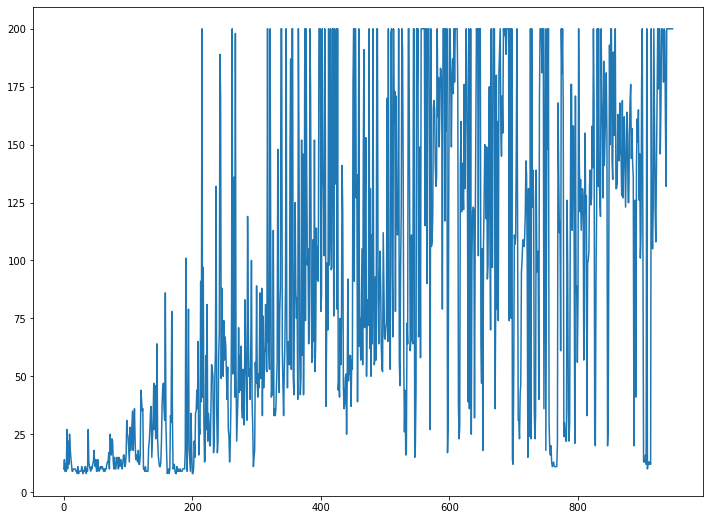

In [7]:
# your code here

from matplotlib import pyplot as plt

plt.figure(figsize=(12,9))
plt.plot(score)
plt.show()
